In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format  # change precision as needed


In [63]:
data = pd.read_csv('Turnout_1980_2022_v1.2.csv')
data['VEP'] = (
    data['VEP']
    .str.replace(',', '', regex=False)
    .astype('int')     # or float/int as needed
)
data['VAP'] = (
    data['VAP']
    .str.replace(',', '', regex=False)
    .astype('int')     # or float/int as needed
)
data['YEAR'] = data['YEAR'].astype('int')

In [64]:
data.head(5)

,YEAR,STATE,STATE_ABV,TOTAL_BALLOTS_COUNTED,VOTE_FOR_HIGHEST_OFFICE,VAP,NONCITIZEN_PCT,INELIGIBLE_PRISON,INELIGIBLE_PROBATION,INELIGIBLE_PAROLE,INELIGIBLE_FELONS_TOTAL,ELIGIBLE_OVERSEAS,VEP,VEP_TURNOUT_RATE,VAP_TURNOUT_RATE
0,2022,United States,NaN,"112,030,874",NaN,260725069,7.50%,"1,175,823","1,074,600","412,595","2,663,018","4,400,000",242907672,46.12%,42.97%
1,2022,Alabama,AL,"1,424,087",https://www.eac.gov/sites/default/files/2023-0...,3956111,2.54%,"25,403","27,469","7,815","60,687",NaN,3794939,37.53%,36.00%
2,2022,Alaska,AK,"267,047",https://www.elections.alaska.gov/election-resu...,556592,3.56%,"4,778","1,872",865,"7,515",NaN,529263,50.46%,47.98%
3,2022,Arizona,AZ,"2,592,313",https://azsos.gov/elections,5796801,7.78%,"31,441","47,515","7,022","85,978",NaN,5259832,49.29%,44.72%
4,2022,Arkansas,AR,"914,227",https://results.enr.clarityelections.com/AR/11...,2347291,3.76%,"17,331","28,009","23,829","69,169",NaN,2189865,41.75%,38.95%


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   YEAR                     1144 non-null   int64 
 1   STATE                    1144 non-null   object
 2   STATE_ABV                1122 non-null   object
 3   TOTAL_BALLOTS_COUNTED    935 non-null    object
 4   VOTE_FOR_HIGHEST_OFFICE  1090 non-null   object
 5   VAP                      1144 non-null   int64 
 6   NONCITIZEN_PCT           1144 non-null   object
 7   INELIGIBLE_PRISON        1144 non-null   object
 8   INELIGIBLE_PROBATION     1144 non-null   object
 9   INELIGIBLE_PAROLE        1144 non-null   object
 10  INELIGIBLE_FELONS_TOTAL  1144 non-null   object
 11  ELIGIBLE_OVERSEAS        22 non-null     object
 12  VEP                      1144 non-null   int64 
 13  VEP_TURNOUT_RATE         935 non-null    object
 14  VAP_TURNOUT_RATE         935 non-null   

In [66]:
data['VEP_PCT_of_Country'] = 0

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   YEAR                     1144 non-null   int64 
 1   STATE                    1144 non-null   object
 2   STATE_ABV                1122 non-null   object
 3   TOTAL_BALLOTS_COUNTED    935 non-null    object
 4   VOTE_FOR_HIGHEST_OFFICE  1090 non-null   object
 5   VAP                      1144 non-null   int64 
 6   NONCITIZEN_PCT           1144 non-null   object
 7   INELIGIBLE_PRISON        1144 non-null   object
 8   INELIGIBLE_PROBATION     1144 non-null   object
 9   INELIGIBLE_PAROLE        1144 non-null   object
 10  INELIGIBLE_FELONS_TOTAL  1144 non-null   object
 11  ELIGIBLE_OVERSEAS        22 non-null     object
 12  VEP                      1144 non-null   int64 
 13  VEP_TURNOUT_RATE         935 non-null    object
 14  VAP_TURNOUT_RATE         935 non-null   

In [68]:
years = data['YEAR'].unique()
states = data['STATE'].unique()

In [97]:
for year in years:
    us_mask = (data['YEAR'] == year) & (data['STATE'] == 'United States')
    us_vep = data.loc[us_mask, 'VEP'].iloc[0]

    year_mask = data['YEAR'] == year
    for state in states:
        mask = year_mask & (data['STATE'] == state)
        data.loc[mask, 'VEP_PCT_OF_TOTAL'] = data.loc[mask, 'VEP'] / us_vep * 100

In [100]:
data

,YEAR,STATE,STATE_ABV,TOTAL_BALLOTS_COUNTED,VOTE_FOR_HIGHEST_OFFICE,VAP,NONCITIZEN_PCT,INELIGIBLE_PRISON,INELIGIBLE_PROBATION,INELIGIBLE_PAROLE,INELIGIBLE_FELONS_TOTAL,ELIGIBLE_OVERSEAS,VEP,VEP_TURNOUT_RATE,VAP_TURNOUT_RATE,VEP_PCT_of_Country,VEP_PCT_OF_TOTAL
0,2022,United States,NaN,"112,030,874",NaN,260725069,7.50%,"1,175,823","1,074,600","412,595","2,663,018","4,400,000",242907672,46.12%,42.97%,0,100.00
1,2022,Alabama,AL,"1,424,087",https://www.eac.gov/sites/default/files/2023-0...,3956111,2.54%,"25,403","27,469","7,815","60,687",NaN,3794939,37.53%,36.00%,0,1.56
2,2022,Alaska,AK,"267,047",https://www.elections.alaska.gov/election-resu...,556592,3.56%,"4,778","1,872",865,"7,515",NaN,529263,50.46%,47.98%,0,0.22
3,2022,Arizona,AZ,"2,592,313",https://azsos.gov/elections,5796801,7.78%,"31,441","47,515","7,022","85,978",NaN,5259832,49.29%,44.72%,0,2.17
4,2022,Arkansas,AR,"914,227",https://results.enr.clarityelections.com/AR/11...,2347291,3.76%,"17,331","28,009","23,829","69,169",NaN,2189865,41.75%,38.95%,0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1980,Virginia,VA,NaN,1866032,3927383,2.00%,"8,920","11,463","4,783","19,435",NaN,3829400,NaN,NaN,0,2.40
1140,1980,Washington,WA,1772904,1742394,3037193,2.90%,"4,399","12,527","14,669","25,332",NaN,2923782,60.64%,58.37%,0,1.83
1141,1980,West Virginia,WV,742150,737715,1396595,0.50%,"1,257","2,650",475,"3,057",NaN,1386555,53.52%,53.14%,0,0.87
1142,1980,Wisconsin,WI,NaN,2273221,3371087,1.00%,"3,980","19,088","2,639","16,163",NaN,3321213,NaN,NaN,0,2.08


In [98]:
year_sample = data.loc[(data['STATE']!='United States')&(data['YEAR']==2022),['STATE','VEP','VEP_PCT_OF_TOTAL']].sort_values(by='VEP_PCT_OF_TOTAL', ascending=False) 

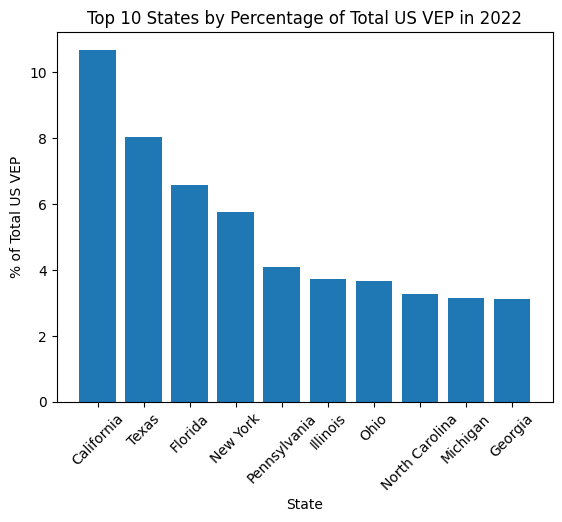

In [99]:
top_year_sample = year_sample.head(10)

##ranked bar chart of year_sample based on VEP_PCT_OF_TOTAL
plt.bar(top_year_sample['STATE'],top_year_sample['VEP_PCT_OF_TOTAL'])
plt.xticks(rotation=45)
plt.title('Top 10 States by Percentage of Total US VEP in 2022')
plt.xlabel('State')
plt.ylabel('% of Total US VEP')
plt.show()

In [107]:
ca_time = data.loc[(data['STATE']=='California'),['YEAR','STATE','VEP','VEP_PCT_OF_TOTAL']].sort_values(by='YEAR', ascending=True)

In [108]:
ca_time

,YEAR,STATE,VEP,VEP_PCT_OF_TOTAL
1097,1980,California,15616072,9.78
1045,1982,California,16162454,10.08
993,1984,California,16614618,9.91
941,1986,California,17157466,10.07
889,1988,California,17745548,10.22
837,1990,California,18145803,10.27
785,1992,California,18470965,10.29
733,1994,California,18489178,10.13
681,1996,California,18653967,10.01
629,1998,California,19273427,10.13


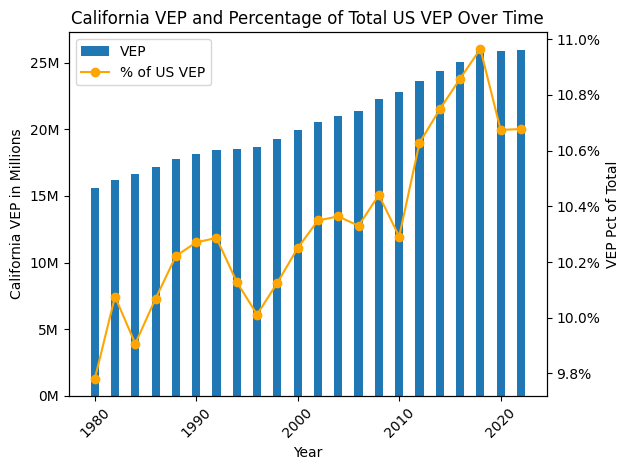

In [137]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter


plt.bar(ca_time['YEAR'], ca_time['VEP'],label='VEP')
plt.xticks(rotation=45)
plt.title('California VEP and Percentage of Total US VEP Over Time')

ax = plt.gca()
ax2 = ax.twinx()  # second y-axis
ax2.plot(ca_time['YEAR'], ca_time['VEP_PCT_OF_TOTAL'], color='orange', marker='o', label='% of US VEP')
ax2.set_ylabel('VEP Pct of Total')   # label for the right-side y-axis
ax.set_ylabel('California VEP in Millions')  # label for the left-side y-axis
ax.set_xlabel('Year')


ax.yaxis.set_major_formatter(
    FuncFormatter(lambda val, pos: f'{val/1000000:.0f}M')
)

ax2.yaxis.set_major_formatter(
    FuncFormatter(lambda val, pos: f'{val:.1f}%')
)

handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()